<a href="https://colab.research.google.com/github/kursatkara/18.337_2015/blob/master/b_05_05_01_dmd_basics_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Define the functions
def f1(xx, tt):
    y_1 = 2 * np.cos(xx) * np.exp(1j * tt)
    return y_1

def f2(xx, tt):
    y_2 = np.sin(xx) * np.exp(3j * tt)
    return y_2

In [5]:
#Define time and space discretizations
xi = np.linspace(-10, 10, 400)
t = np.linspace(0, 4*np.pi, 201)
dt = t[1] - t[0]
xx, tt = np.meshgrid(xi, t)
X = f1(xx, tt) + f2(xx, tt)

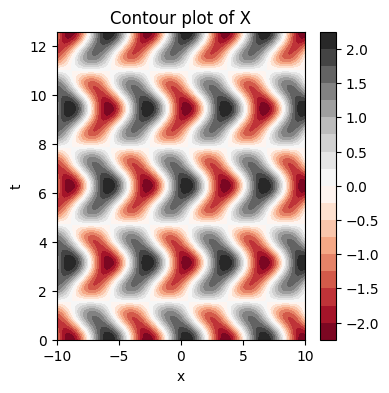

In [6]:
plt.figure(figsize=(4, 4))
plt.contourf(xx, tt, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')
plt.show()


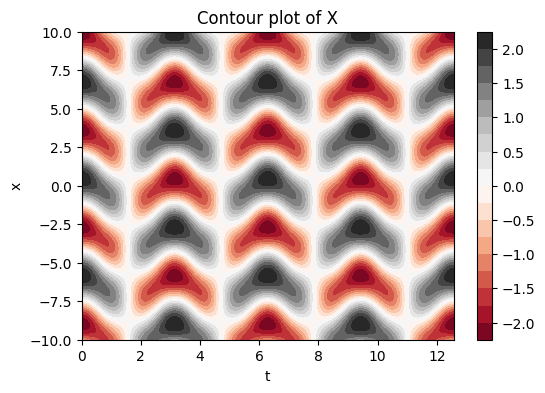

In [7]:
plt.figure(figsize=(6, 4))
plt.contourf(tt.T, xx.T, np.real(X.T), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of X')
plt.show()

In [8]:
X_1 = X.T[:, :-1]
X_2 = X.T[:, 1:]


In [9]:
# Step 1 - SVD
# U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
U, Sigma, VT = np.linalg.svd(X_1,full_matrices=0)
print(U.shape,Sigma.shape, VT.shape)


(400, 200) (200,) (200, 200)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


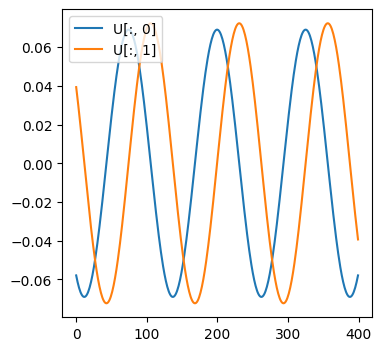

In [10]:
plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
#plt.plot(U[:, 2], label='U[:, 2]')
#plt.plot(U[:, 3], label='U[:, 3]')
plt.legend(loc='upper left')
plt.show()


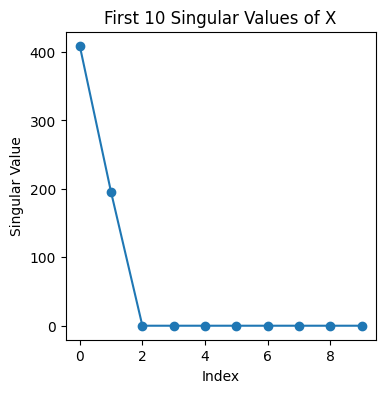

In [11]:
plt.figure(figsize=(4, 4))
plt.plot(Sigma[:10], 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

In [12]:
print(Sigma[:4])


[4.09197304e+02 1.95293092e+02 1.71219345e-13 9.77353812e-14]


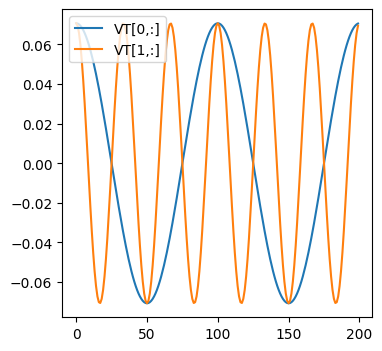

In [13]:
plt.figure(figsize=(4, 4))
plt.plot(VT[0,:], label='VT[0,:]')
plt.plot(VT[1,:], label='VT[1,:]')
#plt.plot(V[2,:], label='VT[2,:]')
#plt.plot(V[3,:], label='VT[3,:]')
plt.legend(loc='upper left')
plt.show()

**Take only the first two modes**

In [14]:
r =2
Ur = U[:, :r]
Sigmar = np.diag(Sigma[:r])
VTr = VT[:r, :]
print(Ur.shape, Sigmar.shape, VTr.shape)

(400, 2) (2, 2) (2, 200)


In [15]:
print(X_2.shape)

(400, 200)


In [16]:
print(Ur[:2,:2])

[[-0.05799776+7.11886290e-17j  0.03939525+1.58365802e-16j]
 [-0.05980901+2.55676730e-16j  0.03630137-5.04967735e-16j]]


In [17]:
A_tilde = np.linalg.solve(Sigmar.T,(Ur.T @ X_2 @ VTr.T).T).T

In [18]:
print(A_tilde)

[[-6.94572256e-17-1.73643064e-17j  4.24940830e-17-1.10091462e-16j]
 [ 2.00489037e-17-3.78023229e-17j  1.45533614e-16+1.18246061e-16j]]


In [19]:
Lambda, W = np.linalg.eig(A_tilde)

In [20]:
Lambda = np.diag(Lambda)
print(Lambda)

[[-4.86025522e-17-1.16771541e-17j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.24678941e-16+1.12558909e-16j]]


In [21]:
print(W)

[[ 0.983634  +0.j         -0.09902086-0.43989529j]
 [ 0.01837131+0.17923909j  0.89257325+0.j        ]]


In [22]:
Phi = X_2 @ np.linalg.solve(Sigmar.T,VTr).T @ W

In [23]:
print(Phi[:2,:])

[[-6.20337429e-18+4.02833575e-18j  9.30641819e-18+8.24657216e-18j]
 [ 5.21082295e-18+3.56092475e-18j  5.05495958e-18+5.21671110e-18j]]


In [24]:
#print(np.linalg.pinv(Phi))

In [25]:
alpha1 = Sigmar @ VTr[:,0]

In [26]:
b = np.linalg.solve(W @ Lambda, alpha1)


In [27]:
print(b)

[-6.94810489e+17+3.35512860e+16j  4.31135863e+16-9.50139957e+16j]


In [31]:
Omega = np.log(np.diag(Lambda))/dt

In [32]:
print(Omega)


[-597.38483133-46.24730222j -578.09434177+11.68761388j]


In [34]:
#b = np.hstack([b, np.zeros((2, 1))])  # Add an extra column to b


In [35]:
t_exp = np.arange(X.T.shape[1]) * dt
temp = np.repeat(Omega.reshape(-1,1), t_exp.size, axis=1)
dynamics = np.exp(temp * t_exp) * b.reshape(2, -1)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


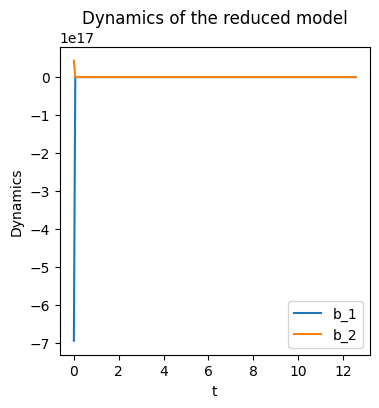

In [36]:
plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='b_1')
plt.plot(t_exp, dynamics[1, :], '-', label='b_2')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


In [37]:
X_dmd = Phi @ dynamics


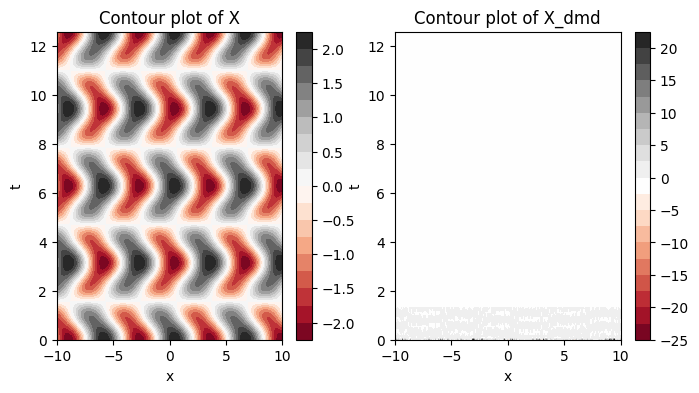

In [38]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.contourf(xx, tt, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')

plt.subplot(1, 2, 2)
plt.contourf(xx, tt, np.real(X_dmd.T), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X_dmd')

plt.show()